In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf

In [13]:
data_url = "data/gasregularpormes.csv"
data = pd.read_csv(data_url)

In [14]:
# Display basic information about the dataset
print("Dataset Summary:")
print(data.info())

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MES/AÑO     13 non-null     object 
 1   Unnamed: 1  2 non-null      float64
 2   2001        10 non-null     float64
 3   2002        12 non-null     float64
 4   2003        12 non-null     float64
 5   2004        13 non-null     float64
 6   2005        13 non-null     float64
 7   2006        13 non-null     float64
 8   2007        13 non-null     float64
 9   2008        13 non-null     float64
 10  2009        13 non-null     float64
 11  2010        13 non-null     float64
 12  2011        13 non-null     float64
 13  2012        13 non-null     float64
 14  2013        13 non-null     float64
 15  2014        13 non-null     float64
 16  2015        13 non-null     float64
 17  2016        13 non-null     float64
 18  2017        13 non-null     float64
 19  2018        13

In [15]:
# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   MES/AÑO  Unnamed: 1   2001   2002   2003   2004   2005   2006   2007  \
0    ENERO         NaN  14.15  12.57  15.37  15.80  18.52  22.15  22.48   
1  FEBRERO         NaN    NaN    NaN    NaN  17.08  18.07  21.87  21.52   
2    MARZO         NaN  14.13  12.65  17.27  17.71  19.25  21.69  22.61   
3    ABRIL         NaN  14.10  14.22  16.50  18.07  21.42  23.99  25.01   
4     MAYO         NaN  15.21  14.29  15.43  18.45  21.97  26.37  26.99   

    2008  ...   2014   2015   2016   2017   2018   2019   2020   2021   2022  \
0  28.28  ...  33.33  20.28  18.90  23.19  24.77  21.87  24.59  23.01  30.60   
1  28.18  ...  32.46  21.75  17.91  22.38  24.69  22.68  23.48  24.74  33.08   
2  29.55  ...  32.77  23.49  19.54  21.95  24.70  24.61  22.58  26.89  38.51   
3  30.99  ...  33.59  24.07  20.78  22.72  25.99  26.63  17.96  27.22  35.80   
4  32.44  ...  33.20  25.38  21.63  22.15  27.23  26.69  17.71  27.98  39.37   

    2023  
0  33.70  
1  33.53  
2  32

In [16]:
# Summary statistics of numerical columns
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Unnamed: 1       2001       2002       2003       2004       2005  \
count    2.000000  10.000000  12.000000  12.000000  13.000000  13.000000   
mean    13.510000  14.318000  14.510000  16.634167  18.330769  22.067692   
std      0.947523   0.558586   1.044884   3.038691   1.041197   2.551996   
min     12.840000  13.570000  12.570000  14.580000  15.800000  18.070000   
25%     13.175000  14.065000  14.200000  15.280000  18.070000  21.420000   
50%     13.510000  14.115000  14.515000  15.970000  18.450000  21.970000   
75%     13.845000  14.562500  15.332500  16.532500  18.780000  22.800000   
max     14.180000  15.270000  15.690000  25.920000  19.820000  26.720000   

            2006       2007       2008       2009  ...       2014       2015  \
count  13.000000  13.000000  13.000000  13.000000  ...  13.000000  13.000000   
mean   24.365385  25.815385  30.582308  23.506154  ...  31.632308  22.763846   
std     2.062614   2.258110   4.068620   2.497928  ...

In [17]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
MES/AÑO        0
Unnamed: 1    11
2001           3
2002           1
2003           1
2004           0
2005           0
2006           0
2007           0
2008           0
2009           0
2010           0
2011           0
2012           0
2013           0
2014           0
2015           0
2016           0
2017           0
2018           0
2019           0
2020           0
2021           0
2022           0
2023           7
dtype: int64

Missing Values:
MES/AÑO        0
Unnamed: 1    11
2001           3
2002           1
2003           1
2004           0
2005           0
2006           0
2007           0
2008           0
2009           0
2010           0
2011           0
2012           0
2013           0
2014           0
2015           0
2016           0
2017           0
2018           0
2019           0
2020           0
2021           0
2022           0
2023           7
dtype: int64


In [18]:
data_cleaned = data
data_cleaned['2001'].fillna(method='ffill', inplace=True)
data_cleaned['2023'].fillna(method='ffill', inplace=True)

In [19]:
# Check for missing values
print("\nMissing Values:")
print(data_cleaned.isnull().sum())


Missing Values:
MES/AÑO        0
Unnamed: 1    11
2001           0
2002           1
2003           1
2004           0
2005           0
2006           0
2007           0
2008           0
2009           0
2010           0
2011           0
2012           0
2013           0
2014           0
2015           0
2016           0
2017           0
2018           0
2019           0
2020           0
2021           0
2022           0
2023           0
dtype: int64


In [20]:
fechas = []
precios = []

for i in range(1, 24):
    for j in range(0, 12):
        fechas.append(str(data_cleaned.columns[i]) + "-" + str(j+1).zfill(2))
        precios.append(data_cleaned.iloc[j, i])

data_transformation = pd.DataFrame({'Fecha': fechas, 'Precio': precios})

print(data_transformation)

             Fecha  Precio
0    Unnamed: 1-01     NaN
1    Unnamed: 1-02     NaN
2    Unnamed: 1-03     NaN
3    Unnamed: 1-04     NaN
4    Unnamed: 1-05     NaN
..             ...     ...
271        2022-08   35.11
272        2022-09   34.28
273        2022-10   36.40
274        2022-11   35.97
275        2022-12   33.10

[276 rows x 2 columns]


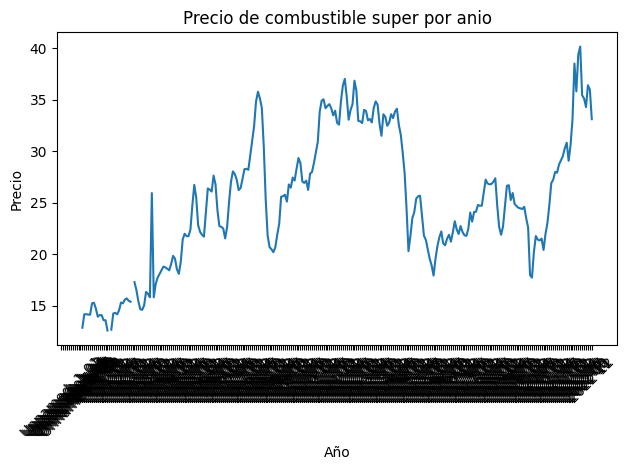

In [21]:
# plt.plot(data_transformation)
# plt.gca().set(title="Precio de combustible super por mes", xlabel="Año", ylabel="Precio")
# plt.show()
plt.plot(data_transformation['Fecha'], data_transformation['Precio'])
plt.gca().set(title="Precio de combustible super por anio", xlabel="Año", ylabel="Precio")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()       # Adjust layout for better spacing
plt.show()

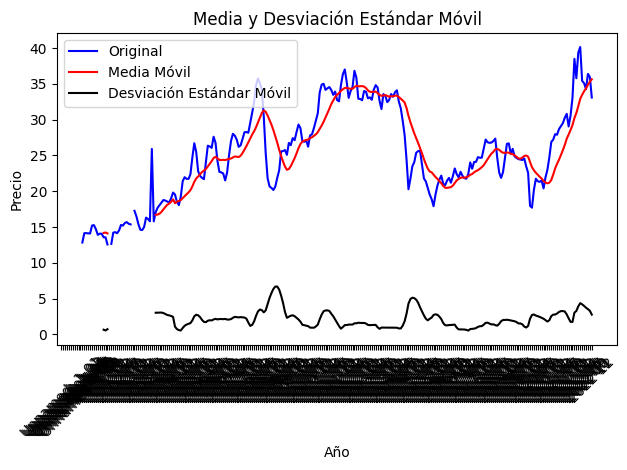

In [22]:
mediaMovil = data_transformation['Precio'].rolling(window=12).mean()
deMovil = data_transformation['Precio'].rolling(window=12).std()

# Plotting the results
plt.plot(data_transformation['Fecha'], data_transformation['Precio'], color="blue", label="Original")
plt.plot(data_transformation['Fecha'], mediaMovil, color='red', label='Media Móvil')
plt.plot(data_transformation['Fecha'], deMovil, color='black', label='Desviación Estándar Móvil')

plt.legend(loc='best')
plt.title('Media y Desviación Estándar Móvil')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

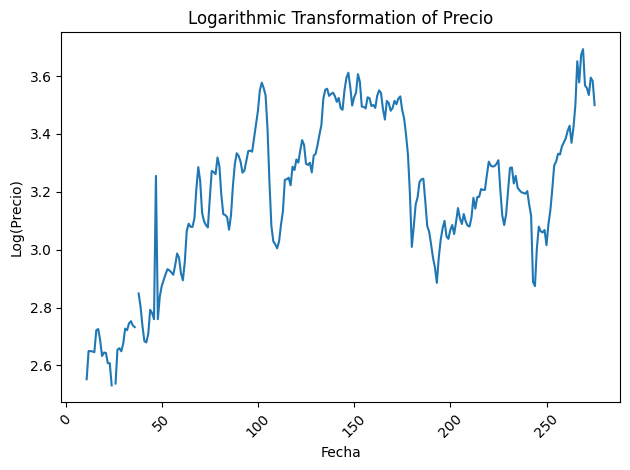

In [23]:
data_transformation['Precio_Log'] = np.log(data_transformation['Precio'])
data_transformation_log = np.log(data_transformation['Precio'])
plt.plot(data_transformation.index, data_transformation['Precio_Log'])
plt.gca().set(title="Logarithmic Transformation of Precio", xlabel="Fecha", ylabel="Log(Precio)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
data_cleaned = data_transformation.dropna(subset=['Precio'])
mean_precio = data_transformation['Precio'].mean()
data_transformation['Precio'].fillna(mean_precio, inplace=True)


In [25]:
print('Resultados del Test de Dickey Fuller')
dfTest = adfuller(data_transformation['Precio'], autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)' % key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller
Estadístico de prueba         -1.959999
p-value                        0.304383
# de retardos usados          15.000000
# de observaciones usadas    260.000000
Critical Value (1%)           -3.455754
Critical Value (5%)           -2.872721
Critical Value (10%)          -2.572728
dtype: float64


In [26]:
non_numeric_rows = data_transformation[~data_transformation['Precio'].apply(pd.to_numeric, errors='coerce').notnull()]
print(non_numeric_rows)


Empty DataFrame
Columns: [Fecha, Precio, Precio_Log]
Index: []


In [27]:
data_transformation['Fecha'] = pd.to_datetime(data_transformation['Fecha'], errors='coerce')
data_transformation['Fecha'] = data_transformation['Fecha'].sub(pd.Timestamp('1970-01-01')).dt.days


C:\Users\rebec\AppData\Local\Temp\ipykernel_10892\3797463665.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_transformation['Fecha'] = pd.to_datetime(data_transformation['Fecha'], errors='coerce')


In [28]:
data_transformation_diff = data_transformation['Precio'].diff()
data_transformation_diff.dropna(inplace=True)
dfTest = adfuller(data_transformation_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key, value in dfTest[4].items():
    salidaDf['Critical Value (%s)' % key] = value
print(salidaDf)

Estadístico de prueba         -4.534115
p-value                        0.000171
# de retardos usados          14.000000
# de observaciones usadas    260.000000
Critical Value (1%)           -3.455754
Critical Value (5%)           -2.872721
Critical Value (10%)          -2.572728
dtype: float64


In [29]:
data_transformation_diff = data_transformation_diff.diff()
data_transformation_diff.dropna(inplace=True)
dfTest = adfuller(data_transformation_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Estadístico de prueba       -8.008275e+00
p-value                      2.236954e-12
# de retardos usados         1.400000e+01
# de observaciones usadas    2.590000e+02
Critical Value (1%)         -3.455853e+00
Critical Value (5%)         -2.872765e+00
Critical Value (10%)        -2.572752e+00
dtype: float64


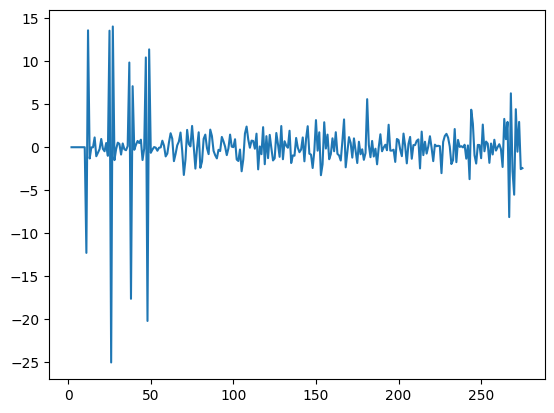

In [30]:
plt.plot(data_transformation_diff)

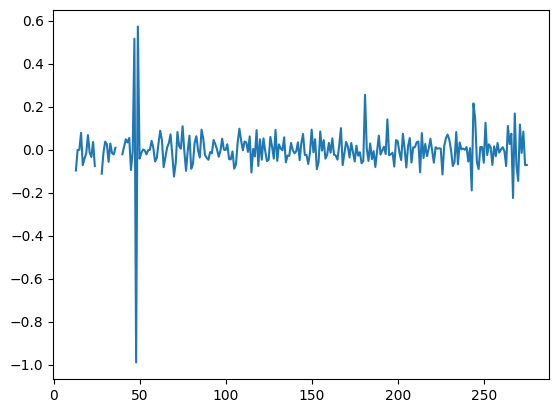

In [31]:
plt.plot(data_transformation_log.diff().diff())

In [32]:
data_transformation_log_diff = data_transformation_log.diff().diff()
data_transformation_log_diff.dropna(inplace = True)
tsa_acf = acf(data_transformation_log_diff,nlags=5,fft=False)
tsa_pacf = pacf(data_transformation_log_diff, nlags=36)
tsa_acf

array([ 1.        , -0.51809145,  0.04384223,  0.01642932, -0.04993613,
        0.02485411])

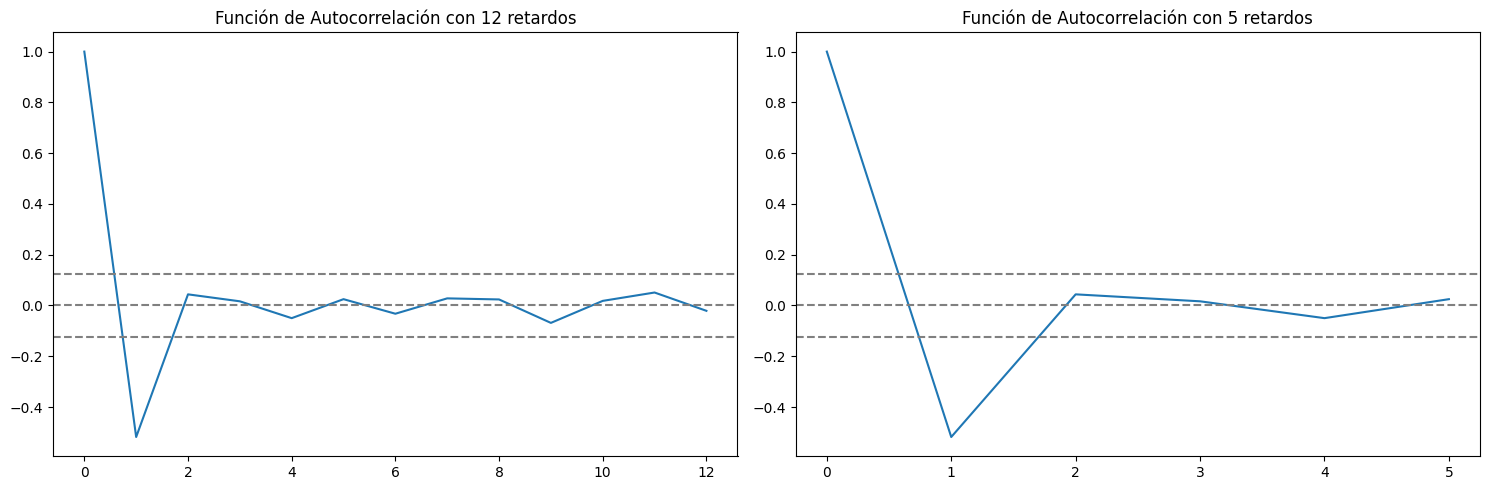

In [33]:

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

#Plot ACF: 
plt.subplot(121) 
plt.plot(acf(data_transformation_log_diff,nlags=12,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 12 retardos')

plt.subplot(122) 
plt.plot(acf(data_transformation_log_diff,nlags=5,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 5 retardos')

plt.tight_layout()

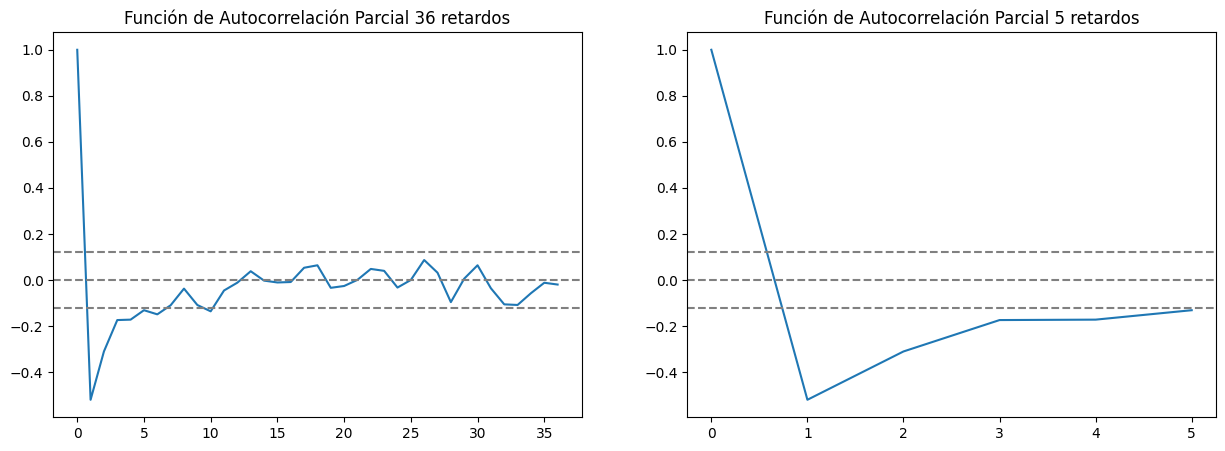

In [34]:
#plot PACF
plt.subplot(121)
plt.plot(pacf(data_transformation_log_diff, nlags=36))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 36 retardos')

plt.subplot(122)
plt.plot(pacf(data_transformation_log_diff, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 retardos')

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

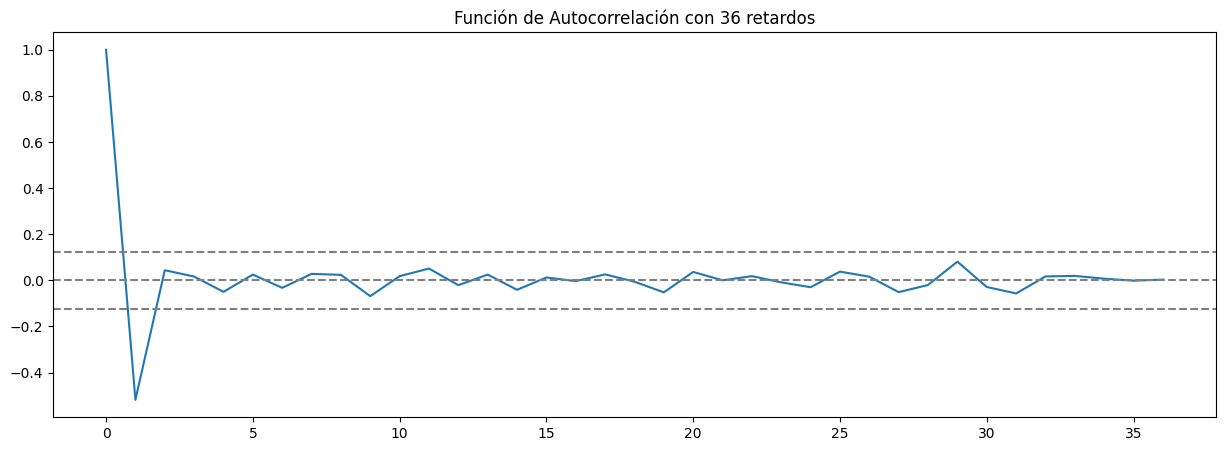

In [35]:
plt.plot(acf(data_transformation_log_diff,nlags=36,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 36 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

Text(0.5, 1.0, 'Función de Autocorrelación Parcial 5 retardos')

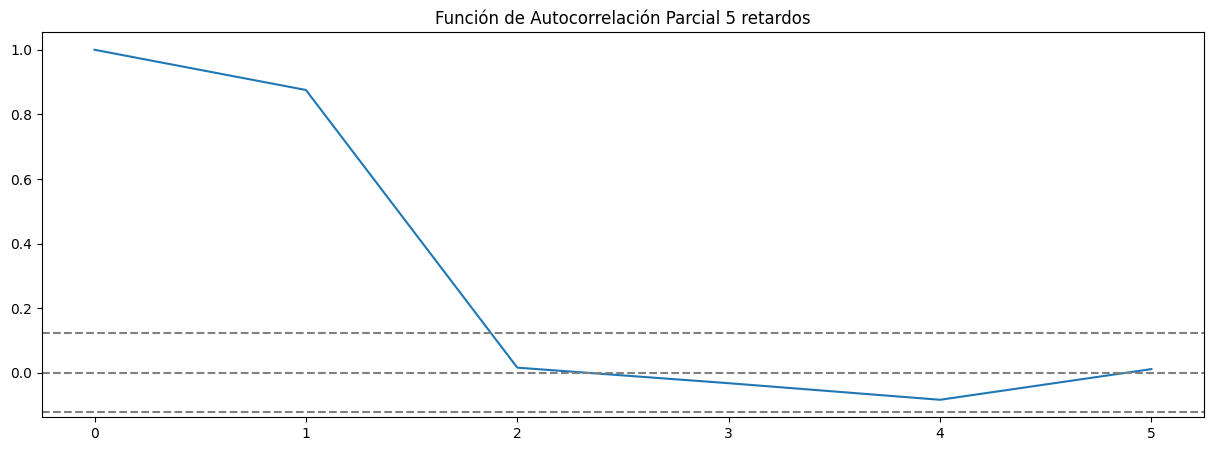

In [36]:
data_transformation_log_D = data_transformation_log.diff(12)
data_transformation_log_D.dropna(inplace=True)
plt.plot(pacf(data_transformation_log_D, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 retardos')